# Import Necessary Libraries and Load Dataset

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("C:\\Users\\kiran\\Desktop\\infosys Intern\\final_adjusted_crowd_dataset.csv") 
# Specify the sensor columns to analyze
sensor_columns = ['Acc X', 'Acc Y', 'Acc Z', 'gyro_x', 'gyro_y', 'gyro_z']

# Display the first few rows to confirm loading
data.head()


,Longitude,Latitude,Speed,Distance,Time,Acc X,Acc Y,Acc Z,Heading,gyro_x,gyro_y,gyro_z,label
0,73.822661,18.501627,0.0,0.0,18-45-12,0.046402,-0.137178,-0.282934,352.0,-0.036306,-0.008226,-0.023416,0
1,73.822661,18.501627,0.0,0.0,18-45-12,-0.136978,0.365242,0.108889,352.0,0.035776,-0.009448,0.009570,0
2,73.822661,18.501627,0.0,0.0,18-45-13,-0.045355,-0.103340,-0.534985,352.0,-0.011871,-0.027774,0.003462,0
3,73.822661,18.501627,0.0,0.0,18-45-13,0.242089,0.072761,-0.350396,352.0,-0.017980,0.002769,-0.005091,0
4,73.822661,18.501627,0.0,0.0,18-45-13,-0.230234,0.011765,-0.494085,352.0,0.011342,0.003380,0.006516,0


# Calculate IQR and Fine-Tune Thresholds Using Tukey’s Method

In [2]:
# Task-3: Define a more robust IQR multiplier (e.g., 2.5 for Tukey's method)
iqr_multiplier = 2.5
iqr_info = {}  # To store Q1, Q3, and IQR values for each sensor
refined_outliers = pd.DataFrame(index=data.index)  # To store refined outliers

# Calculate refined bounds for each sensor column
for col in sensor_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    iqr_info[col] = {'Q1': Q1, 'Q3': Q3, 'IQR': IQR}
    
    # Define refined bounds with Tukey's method
    lower_bound = Q1 - iqr_multiplier * IQR
    upper_bound = Q3 + iqr_multiplier * IQR
    
    # Flag outliers using refined bounds
    refined_outliers[col] = ((data[col] < lower_bound) | (data[col] > upper_bound)).astype(int)

# Display IQR, Q1, and Q3 values for each sensor
for sensor, values in iqr_info.items():
    print(f"{sensor}: Q1 = {values['Q1']}, Q3 = {values['Q3']}, IQR = {values['IQR']}")


Acc X: Q1 = -0.37937883, Q3 = 0.3624705, IQR = 0.74184933
Acc Y: Q1 = -0.12676811, Q3 = 0.47869587, IQR = 0.60546398
Acc Z: Q1 = -0.7013532, Q3 = 0.67468005, IQR = 1.3760332499999999
gyro_x: Q1 = -0.046690468, Q3 = 0.04493932, IQR = 0.09162978799999999
gyro_y: Q1 = -0.033271793, Q3 = 0.021706078, IQR = 0.054977871
gyro_z: Q1 = -0.027224237, Q3 = 0.024088446, IQR = 0.051312683


# Calculate and Compare Outlier Counts

In [3]:
# Calculate the percentage of outliers for each sensor using refined IQR
refined_outlier_summary = {col: (refined_outliers[col].sum() / len(refined_outliers) * 100) for col in sensor_columns}

# Display the outlier summary for refined IQR
print("\nRefined IQR Outlier Summary (using multiplier of 2.5):")
for col, percentage in refined_outlier_summary.items():
    print(f"{col}: {percentage:.2f}% of readings are outliers.")



Refined IQR Outlier Summary (using multiplier of 2.5):
Acc X: 4.76% of readings are outliers.
Acc Y: 4.84% of readings are outliers.
Acc Z: 4.04% of readings are outliers.
gyro_x: 6.15% of readings are outliers.
gyro_y: 6.31% of readings are outliers.
gyro_z: 4.37% of readings are outliers.


# Visualize Outliers with Box Plots

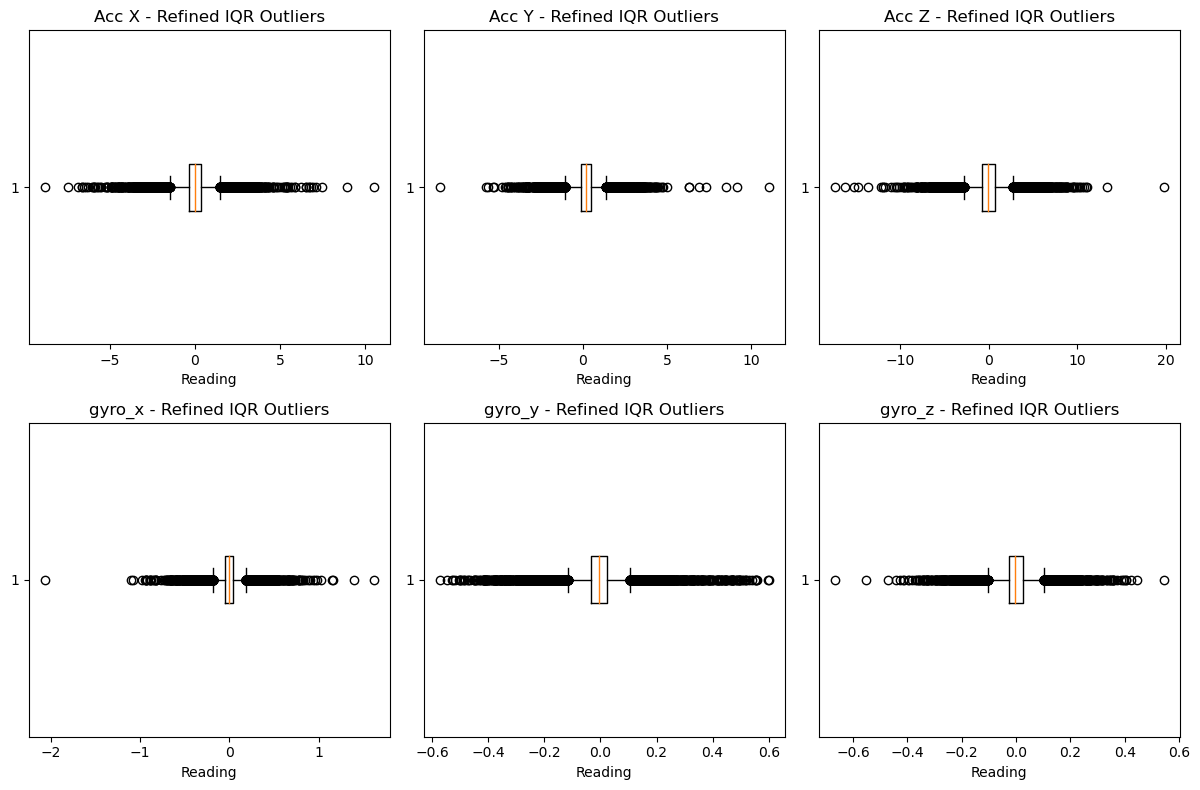

In [4]:
# Set up box plots for each sensor column to visualize refined outliers
plt.figure(figsize=(12, 8))
for i, col in enumerate(sensor_columns, 1):
    plt.subplot(2, 3, i)
    plt.boxplot(data[col], vert=False, showfliers=True)
    plt.title(f'{col} - Refined IQR Outliers')
    plt.xlabel('Reading')

plt.tight_layout()
plt.show()